# Fine tune UMAP for UB - topics + specter2

In [1]:
import utils

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alba.garcia.romo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [3]:
df_topics = pd.read_parquet("df_topic_embeddings_UB_2024.parquet")
df_works = pd.read_parquet("01. data\df_works_UB_2024_with_embeddings.parquet")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\alba.garcia.romo\AppData\Local\Temp\ipykernel_30772\3723875786.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_works = pd.read_parquet("01. data\df_works_UB_2024_with_embeddings.parquet")


In [11]:
df_works.columns

Index(['Work Name', 'Publication Year', 'Authors', 'Primary Topic', 'Subfield',
       'Field', 'Domain', 'Abstract', 'x_st', 'y_st', 'x_nomic', 'y_nomic',
       'x_specter', 'y_specter', 'embeddings_st', 'embeddings_nomic',
       'embeddings_specter'],
      dtype='object')

In [4]:
df_topics_embeddings = df_topics.iloc[:, :-2].copy()
print(df_topics_embeddings)


      TOPIC_Dark Matter and Cosmic Phenomena  \
0                                        1.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   
...                                      ...   
7873                                     0.0   
7874                                     0.0   
7875                                     0.0   
7876                                     0.0   
7877                                     0.0   

      TOPIC_Computational Physics and Python Applications  \
0                                                   1.0     
1                                                   0.0     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...  

In [5]:
import numpy as np

embeddings_specter = np.array(df_works['embeddings_specter'].tolist())
print(embeddings_specter)


[[ 0.06795835  0.70273733 -0.51551402 ... -1.02273643 -0.42962956
  -0.7272718 ]
 [ 0.61609209  0.66632396 -0.41249788 ... -0.79701972 -0.02210683
  -0.45308346]
 [-0.19942994  0.33196342 -0.41898558 ... -0.75130874 -1.46727812
  -0.33969828]
 ...
 [ 0.21937519 -0.03956962 -0.38557845 ...  0.20211214 -0.02647964
  -1.12129021]
 [ 0.79625195 -0.04737691 -0.31465888 ... -0.21494697  0.35024366
  -1.28354216]
 [ 0.25907886  0.6875726  -0.54267645 ... -0.45820844 -0.31410152
  -0.52095997]]


In [6]:
def compute_clustering_metrics(X, labels):
    try:
        sil = silhouette_score(X, labels)
    except:
        sil = np.nan
    try:
        ch = calinski_harabasz_score(X, labels)
    except:
        ch = np.nan
    try:
        db = davies_bouldin_score(X, labels)
    except:
        db = np.nan
    return sil, ch, db

## n_neigbors and min_dist

### SPECTER2

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-package

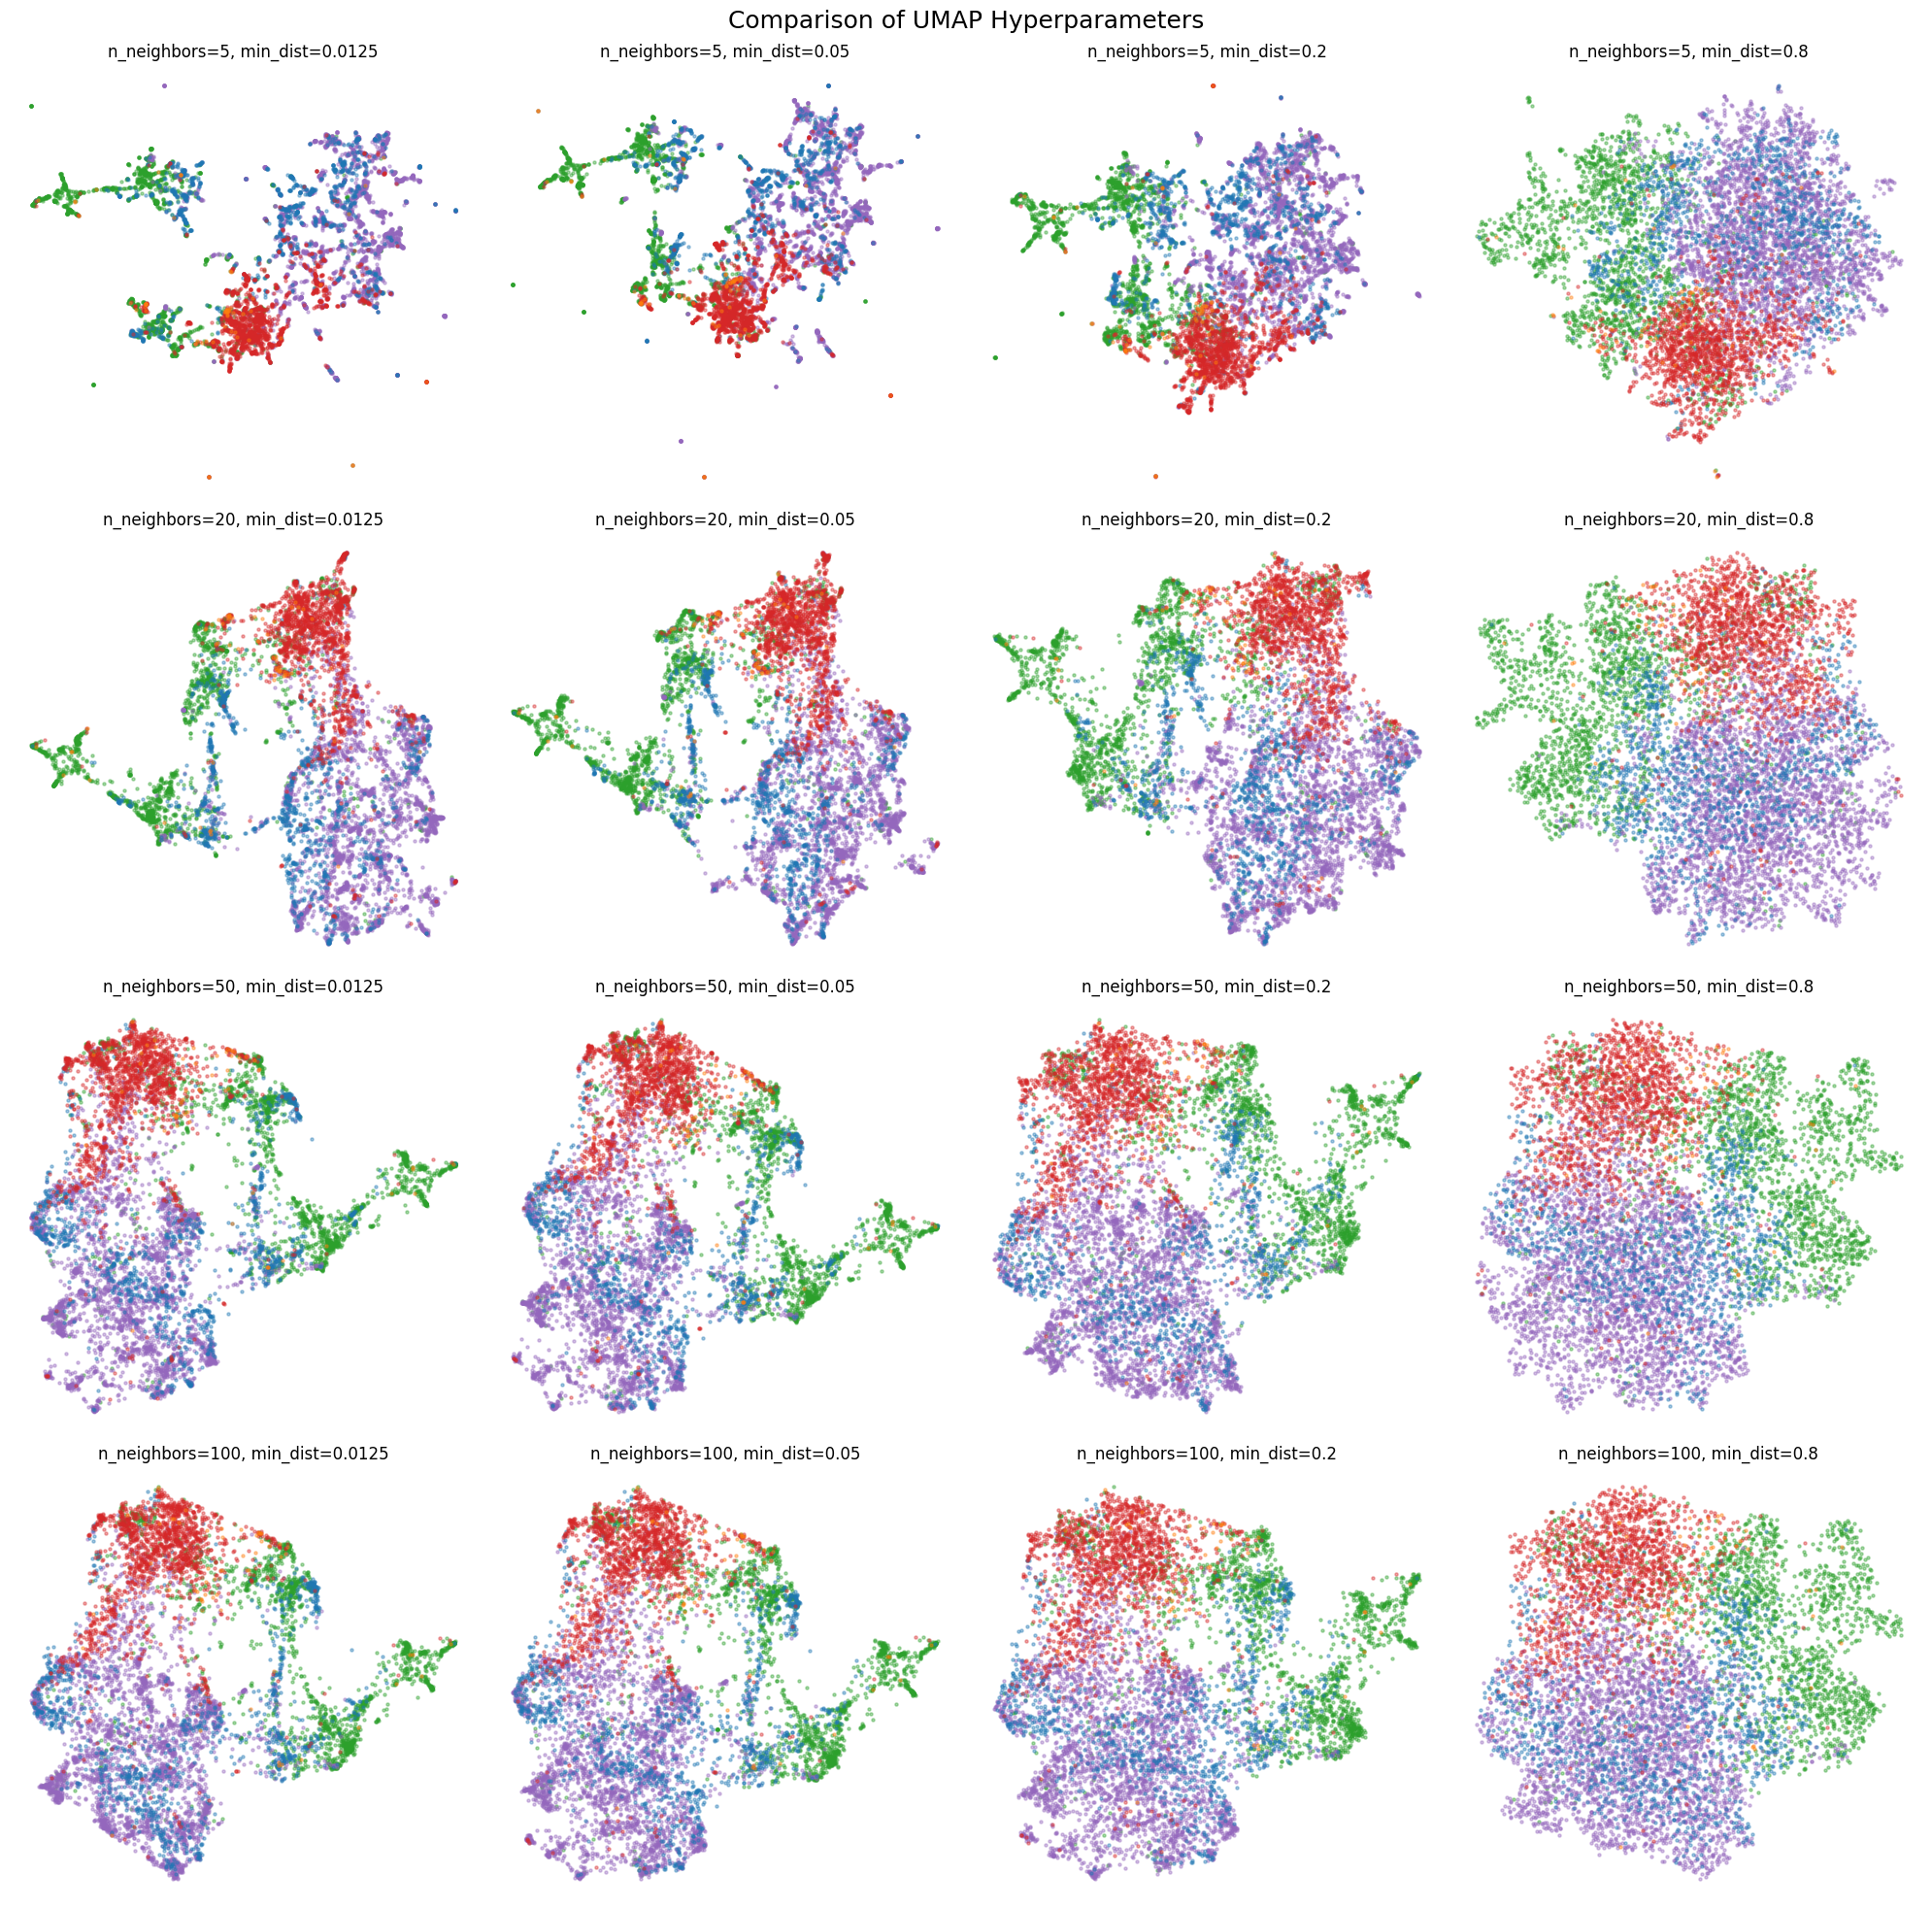

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import create_data_map  # your existing UMAP function

# Parameter grids
n_neighbors_list = [5, 20, 50, 100]
min_dist_list = [0.0125, 0.05, 0.2, 0.8]

# Your data
embeddings = embeddings_specter  # already a NumPy ndarray (N, D)
df_vis_base = df_works.copy()    # must include the 'Domain' column

# Color mapping
domain_colors = {
    'physical sciences': '#2ca02c',
    'health sciences': '#9467bd',
    'life sciences': '#1f77b4',
    'social sciences': '#d62728',
    'unknown': '#ff7f0e'
}

# Save results of clustering metrics
clustering_results = {}

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Loop over all (n_neighbors, min_dist) combinations
for idx, (n_neighbors, min_dist) in enumerate([(nn, md) for nn in n_neighbors_list for md in min_dist_list]):
    ax = axes[idx]
    
    # Run UMAP
    umap_coords = create_data_map(n_neighbors, min_dist, embeddings)

    # Copy and add x, y to df
    df_vis = df_vis_base.copy()
    df_vis["x"] = umap_coords[:, 0]
    df_vis["y"] = umap_coords[:, 1]

    # Compute clustering metrics
    X = df_vis[["x", "y"]].values
    labels = df_vis["Domain"]
    sil, ch, db = compute_clustering_metrics(X, labels)

    # Save to dictionary
    clustering_results[(n_neighbors, min_dist)] = {
        "silhouette": sil,
        "calinski_harabasz": ch,
        "davies_bouldin": db
    }

    # Plot by Domain
    for domain in df_vis["Domain"].dropna().unique():
        subset = df_vis[df_vis["Domain"] == domain]
        color = domain_colors.get(domain.lower(), 'gray')
        ax.scatter(subset["x"], subset["y"], s=5, alpha=0.4, label=domain, color=color)

    ax.set_title(f"n_neighbors={n_neighbors}, min_dist={min_dist}")
    ax.axis("off")

# Final layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Comparison of UMAP Hyperparameters", fontsize=18)
plt.show()


In [21]:
print("clustering metrics for specter loop:\n", clustering_results)

clustering metrics for specter loop:
 {(5, 0.0125): {'silhouette': np.float32(0.07966605), 'calinski_harabasz': np.float32(1607.7668), 'davies_bouldin': np.float64(2.445596005937382)}, (5, 0.05): {'silhouette': np.float32(0.0717045), 'calinski_harabasz': np.float32(1535.7249), 'davies_bouldin': np.float64(2.4898850302909286)}, (5, 0.2): {'silhouette': np.float32(0.08165557), 'calinski_harabasz': np.float32(1654.4471), 'davies_bouldin': np.float64(2.389743362699413)}, (5, 0.8): {'silhouette': np.float32(0.05965682), 'calinski_harabasz': np.float32(1523.187), 'davies_bouldin': np.float64(2.999512301603511)}, (20, 0.0125): {'silhouette': np.float32(0.100626834), 'calinski_harabasz': np.float32(1991.3978), 'davies_bouldin': np.float64(2.0738151542667054)}, (20, 0.05): {'silhouette': np.float32(0.086774215), 'calinski_harabasz': np.float32(1949.5598), 'davies_bouldin': np.float64(2.102196838300693)}, (20, 0.2): {'silhouette': np.float32(0.070211224), 'calinski_harabasz': np.float32(1866.537

In [25]:
df_clustering_specter = pd.DataFrame.from_dict(clustering_results, orient='index')
df_clustering_specter.index = pd.MultiIndex.from_tuples(df_clustering_specter.index, names=['n_neighbors', 'min_dist'])
df_clustering_specter = df_clustering_specter.reset_index()
print(df_clustering_specter)

    n_neighbors  min_dist  silhouette  calinski_harabasz  davies_bouldin
0             5    0.0125    0.079666        1607.766846        2.445596
1             5    0.0500    0.071704        1535.724854        2.489885
2             5    0.2000    0.081656        1654.447144        2.389743
3             5    0.8000    0.059657        1523.187012        2.999512
4            20    0.0125    0.100627        1991.397827        2.073815
5            20    0.0500    0.086774        1949.559814        2.102197
6            20    0.2000    0.070211        1866.536987        2.271967
7            20    0.8000    0.057031        1789.456421        2.398924
8            50    0.0125    0.093015        1815.883545        2.355452
9            50    0.0500    0.089871        1785.954224        2.370351
10           50    0.2000    0.080467        1774.212158        2.770137
11           50    0.8000    0.061376        1793.751953        2.452074
12          100    0.0125    0.094935        1776.7

### Topics space

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-package

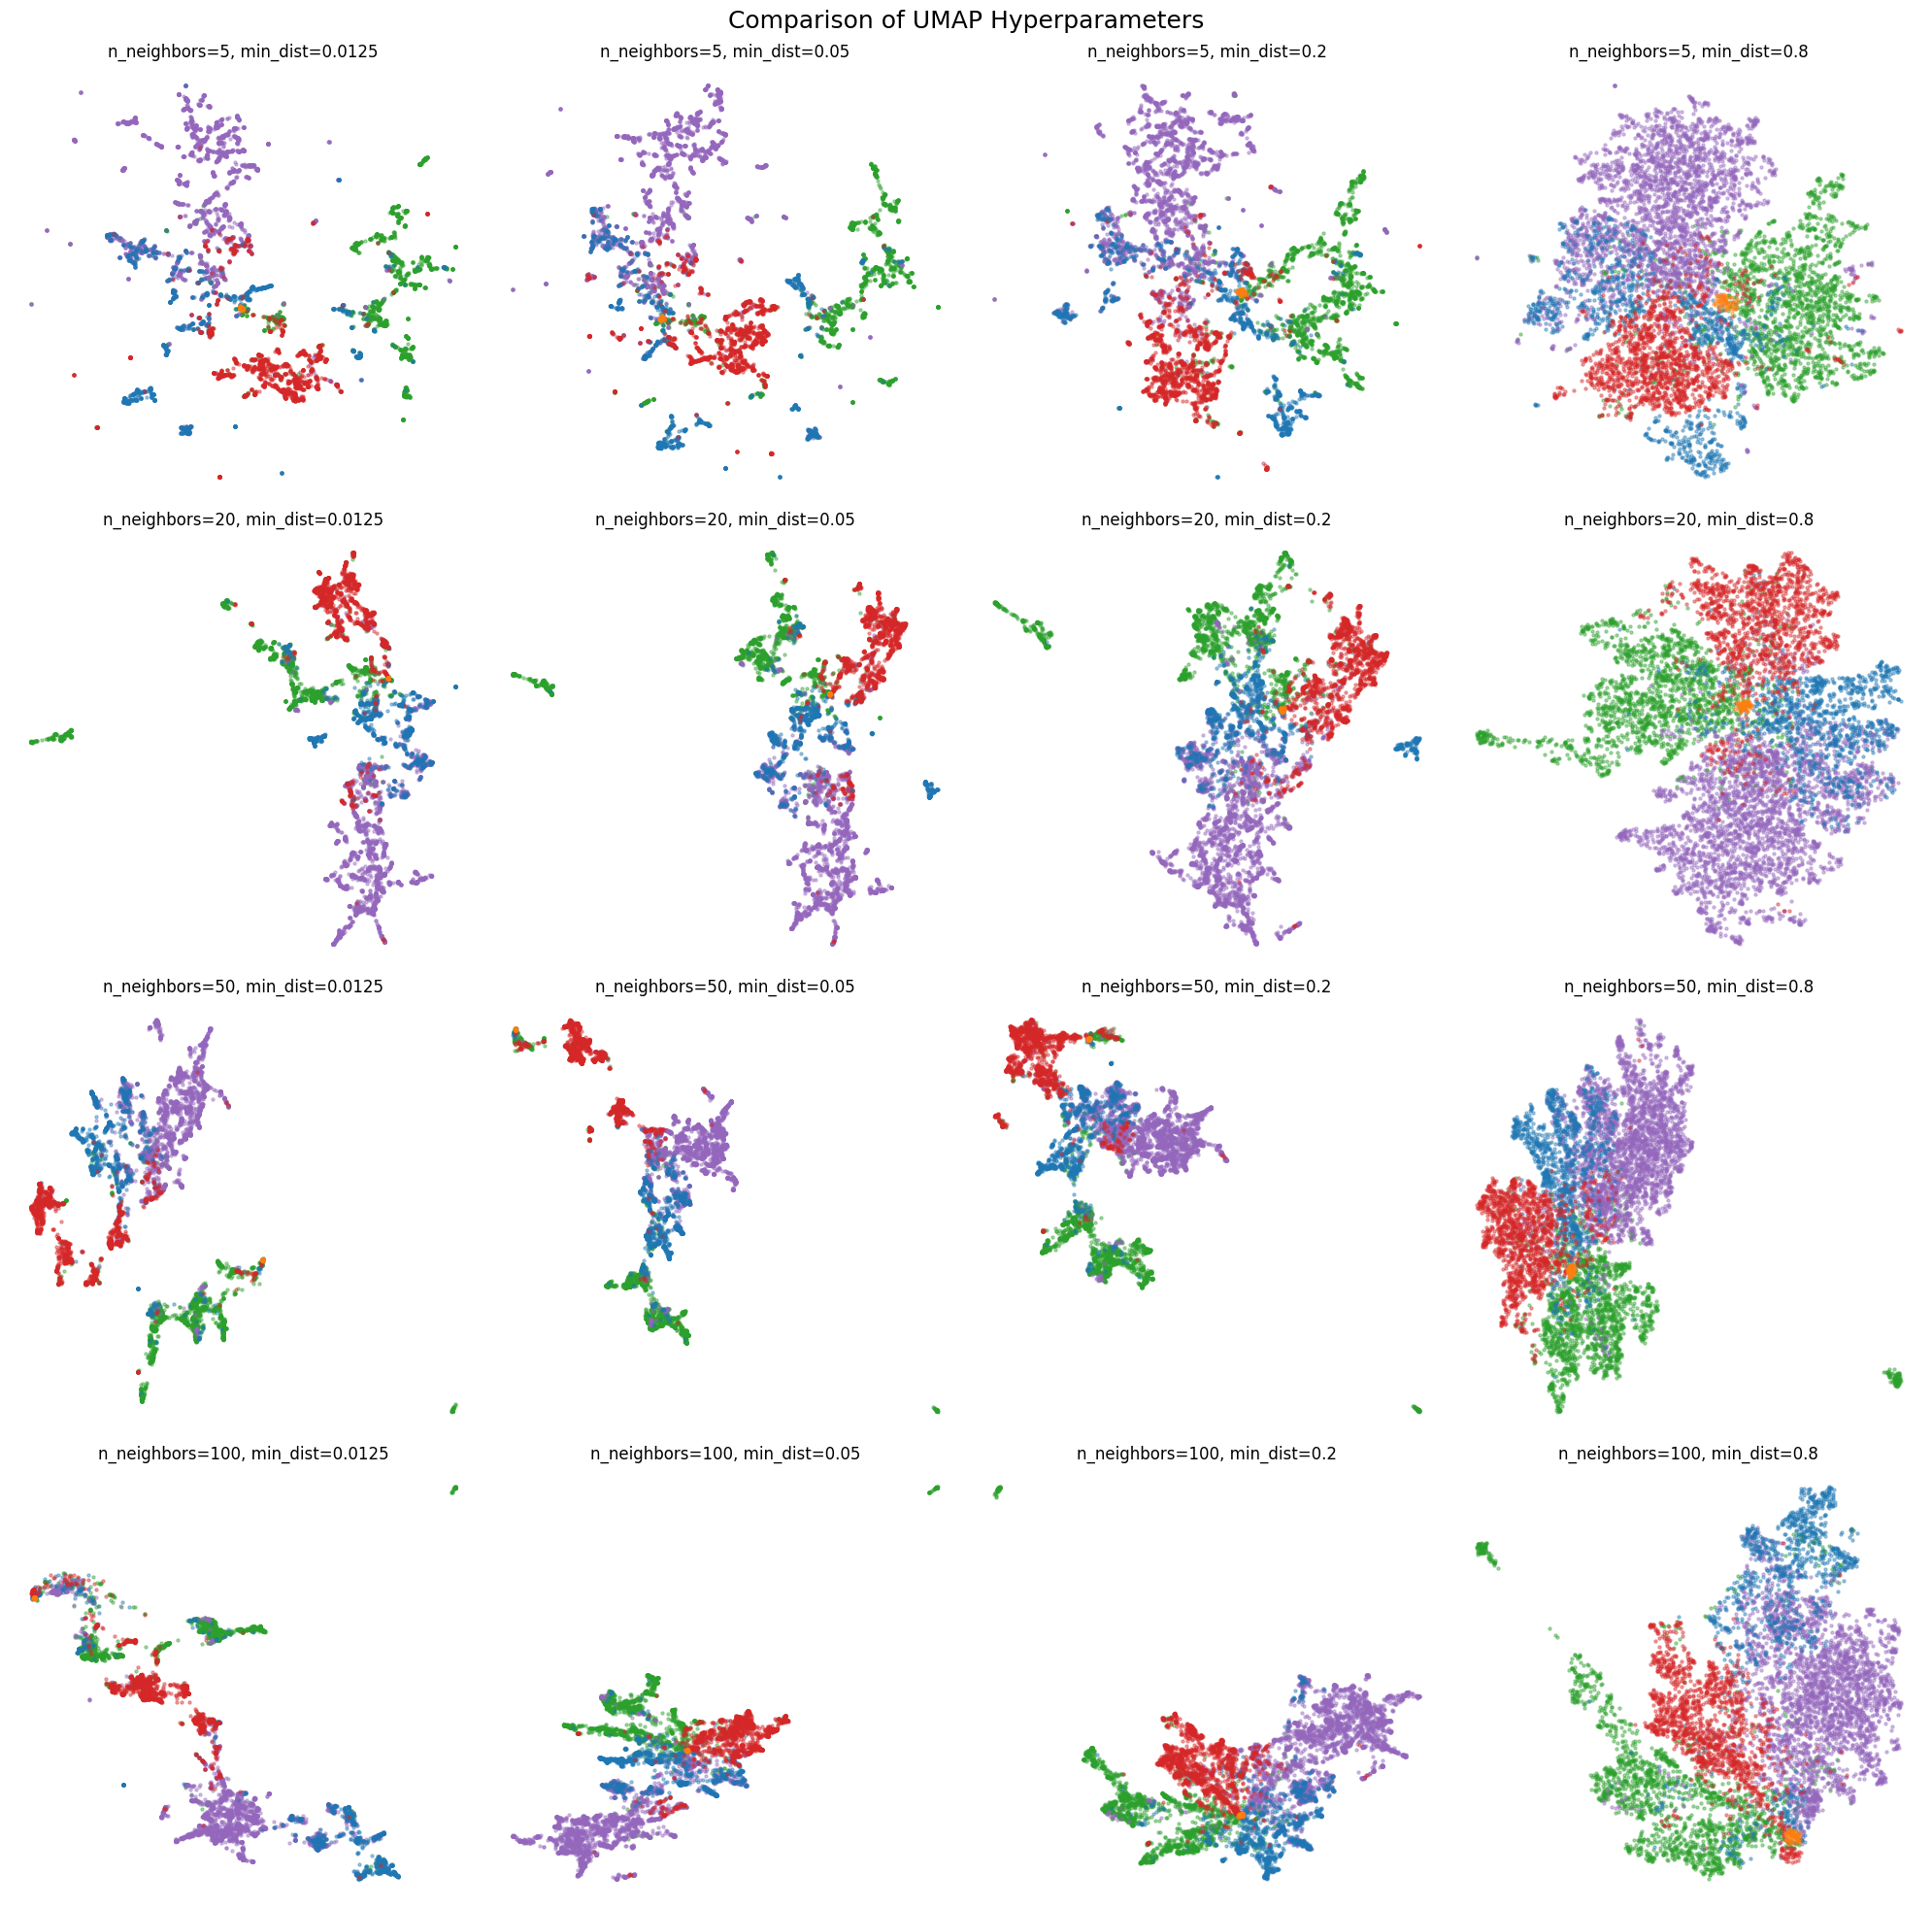

In [22]:
# Parameter grids
n_neighbors_list = [5, 20, 50, 100]
min_dist_list = [0.0125, 0.05, 0.2, 0.8]

# Your data
embeddings = df_topics_embeddings 
df_vis_base = df_works.copy()    # must include the 'Domain' column

# Color mapping
domain_colors = {
    'physical sciences': '#2ca02c',
    'health sciences': '#9467bd',
    'life sciences': '#1f77b4',
    'social sciences': '#d62728',
    'unknown': '#ff7f0e'
}

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

clustering_results_topics = {}

# Loop over all (n_neighbors, min_dist) combinations
for idx, (n_neighbors, min_dist) in enumerate([(nn, md) for nn in n_neighbors_list for md in min_dist_list]):
    ax = axes[idx]
    
    # Run UMAP
    umap_coords = create_data_map(n_neighbors, min_dist, embeddings)

    # Copy and add x, y to df
    df_vis = df_vis_base.copy()
    df_vis["x"] = umap_coords[:, 0]
    df_vis["y"] = umap_coords[:, 1]

    # Compute clustering metrics
    X = df_vis[["x", "y"]].values
    labels = df_vis["Domain"]
    sil, ch, db = compute_clustering_metrics(X, labels)

    # Save to dictionary
    clustering_results_topics[(n_neighbors, min_dist)] = {
        "silhouette": sil,
        "calinski_harabasz": ch,
        "davies_bouldin": db
    }

    # Plot by Domain
    for domain in df_vis["Domain"].dropna().unique():
        subset = df_vis[df_vis["Domain"] == domain]
        color = domain_colors.get(domain.lower(), 'gray')
        ax.scatter(subset["x"], subset["y"], s=5, alpha=0.4, label=domain, color=color)

    ax.set_title(f"n_neighbors={n_neighbors}, min_dist={min_dist}")
    ax.axis("off")

# Final layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Comparison of UMAP Hyperparameters", fontsize=18)
plt.show()


In [23]:
print(clustering_results_topics)

{(5, 0.0125): {'silhouette': np.float32(0.07891342), 'calinski_harabasz': np.float32(2341.3286), 'davies_bouldin': np.float64(1.7101760868729752)}, (5, 0.05): {'silhouette': np.float32(0.039864555), 'calinski_harabasz': np.float32(1727.3931), 'davies_bouldin': np.float64(3.3970742825169133)}, (5, 0.2): {'silhouette': np.float32(0.067516215), 'calinski_harabasz': np.float32(2314.7666), 'davies_bouldin': np.float64(2.380575656798628)}, (5, 0.8): {'silhouette': np.float32(0.03190337), 'calinski_harabasz': np.float32(2074.8865), 'davies_bouldin': np.float64(3.1356233608711364)}, (20, 0.0125): {'silhouette': np.float32(0.08850455), 'calinski_harabasz': np.float32(2653.236), 'davies_bouldin': np.float64(1.175016918279502)}, (20, 0.05): {'silhouette': np.float32(0.061519757), 'calinski_harabasz': np.float32(2577.3235), 'davies_bouldin': np.float64(1.2573631383515673)}, (20, 0.2): {'silhouette': np.float32(0.06473699), 'calinski_harabasz': np.float32(2497.3599), 'davies_bouldin': np.float64(2.

In [24]:
df_clustering_topics = pd.DataFrame.from_dict(clustering_results_topics, orient='index')
df_clustering_topics.index = pd.MultiIndex.from_tuples(df_clustering_topics.index, names=['n_neighbors', 'min_dist'])
df_clustering_topics = df_clustering_topics.reset_index()
print(df_clustering_topics)

    n_neighbors  min_dist  silhouette  calinski_harabasz  davies_bouldin
0             5    0.0125    0.078913        2341.328613        1.710176
1             5    0.0500    0.039865        1727.393066        3.397074
2             5    0.2000    0.067516        2314.766602        2.380576
3             5    0.8000    0.031903        2074.886475        3.135623
4            20    0.0125    0.088505        2653.236084        1.175017
5            20    0.0500    0.061520        2577.323486        1.257363
6            20    0.2000    0.064737        2497.359863        2.125818
7            20    0.8000    0.098186        3272.946289        0.995305
8            50    0.0125    0.200363        2248.944580        1.149287
9            50    0.0500    0.183065        2064.798096        1.560569
10           50    0.2000    0.183479        2052.678223        1.089794
11           50    0.8000    0.056973        2253.711914        1.249176
12          100    0.0125    0.126708        1758.5

## Distance metric

### SPECTER2

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-package

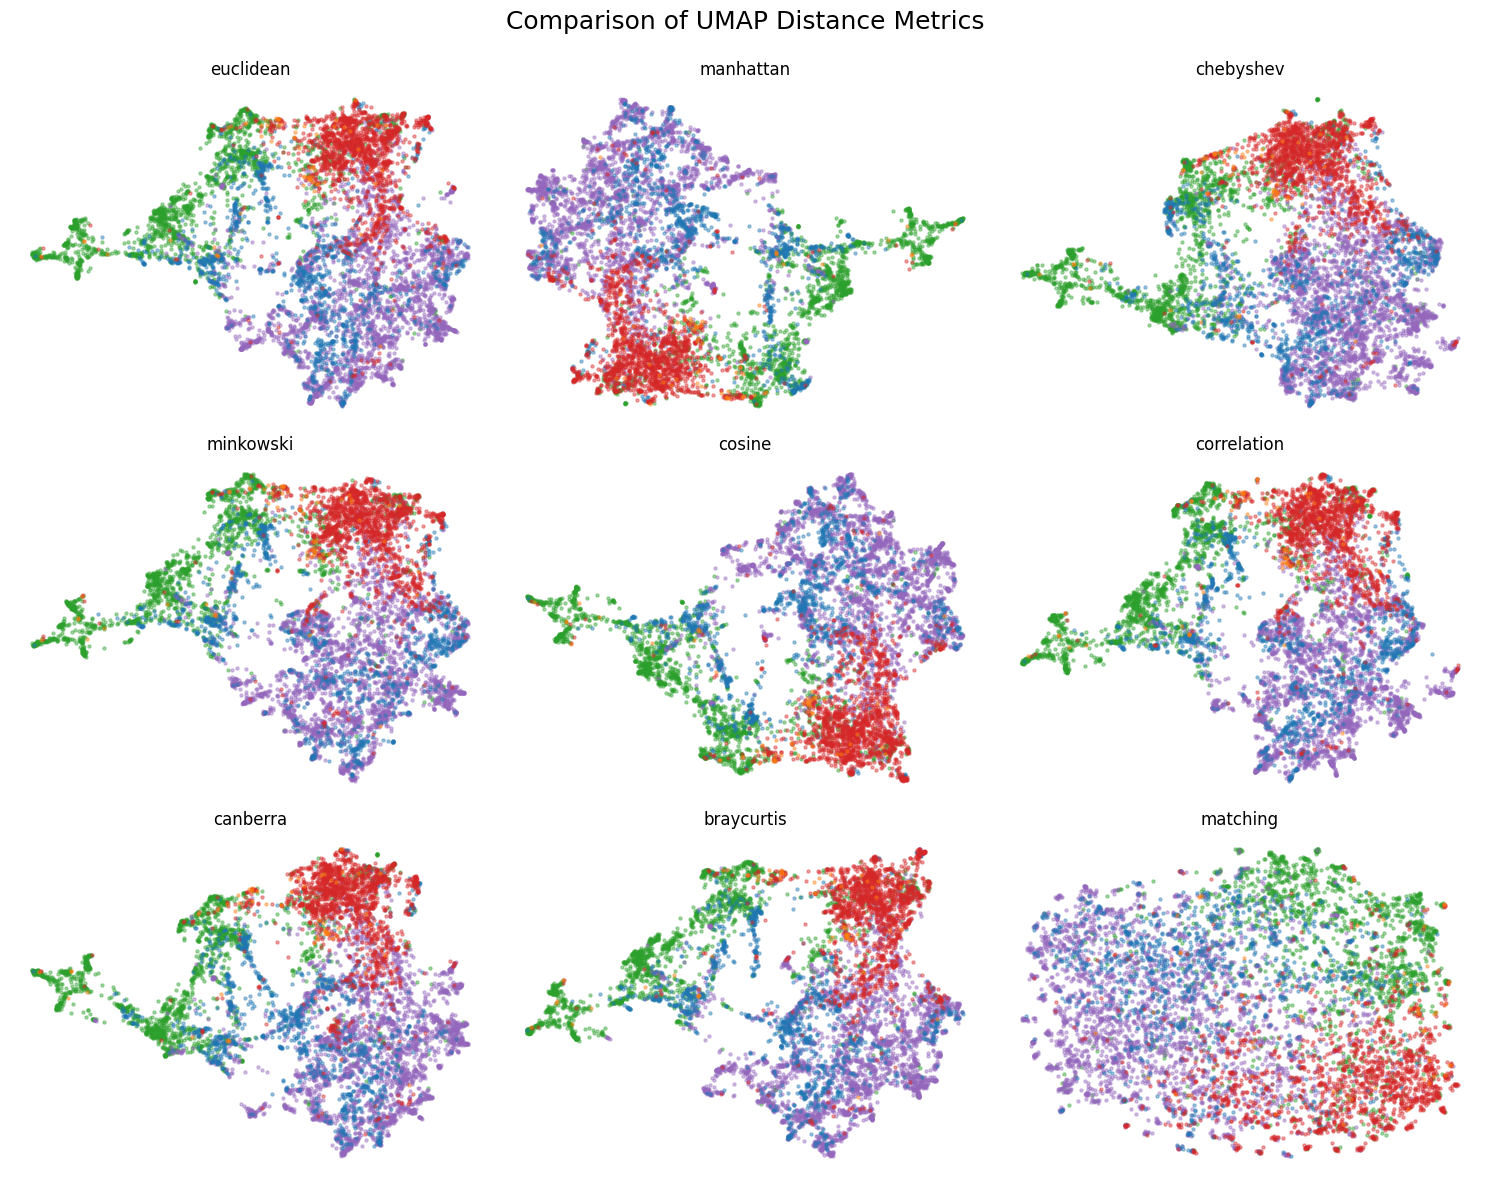

In [7]:
import umap
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Define metric list ===
umap_metrics = [
    "euclidean", "manhattan", "chebyshev", "minkowski", "cosine",
    "correlation", "canberra", "braycurtis", "matching"
]

# === Step 2: Embeddings and Domain data ===
embeddings = embeddings_specter
df_vis_base = df_works.copy()  # must have 'Domain' column

# === Step 3: UMAP hyperparameters ===
n_neighbors = 15
min_dist = 0.1

# === Step 4: Domain color map ===
domain_colors = {
    'physical sciences': '#2ca02c',
    'health sciences': '#9467bd',
    'life sciences': '#1f77b4',
    'social sciences': '#d62728',
    'unknown': '#ff7f0e'
}

# === Step 5: Store clustering results ===
clustering_results_metric_specter = {}

# === Step 6: Plot grid ===
n_cols = 3
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for idx, metric in enumerate(umap_metrics):
    ax = axes[idx]

    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=2,
        metric=metric,
        random_state=42
    )

    try:
        umap_coords = reducer.fit_transform(embeddings)
    except Exception as e:
        print(f"UMAP failed for metric '{metric}': {e}")
        ax.set_title(f"{metric} (error)")
        ax.axis("off")
        continue

    df_vis = df_vis_base.copy()
    df_vis["x"] = umap_coords[:, 0]
    df_vis["y"] = umap_coords[:, 1]

    X = df_vis[["x", "y"]].values
    labels = df_vis["Domain"]
    sil, ch, db = compute_clustering_metrics(X, labels)

    clustering_results_metric_specter[metric] = {
        "silhouette": sil,
        "calinski_harabasz": ch,
        "davies_bouldin": db
    }

    for domain in labels.dropna().unique():
        subset = df_vis[df_vis["Domain"] == domain]
        color = domain_colors.get(domain.lower(), 'gray')
        ax.scatter(subset["x"], subset["y"], s=5, alpha=0.4, color=color)

    ax.set_title(metric)
    ax.axis("off")

# Turn off any unused subplots (not needed in this exact case)
for j in range(len(umap_metrics), len(axes)):
    axes[j].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Comparison of UMAP Distance Metrics", fontsize=18)
plt.show()


In [8]:
print(clustering_results_metric_specter)
df_metrics_specter = pd.DataFrame.from_dict(clustering_results_metric_specter, orient='index')
print(df_metrics_specter)


{'euclidean': {'silhouette': np.float32(0.07751697), 'calinski_harabasz': np.float32(1800.4878), 'davies_bouldin': np.float64(2.174194124406092)}, 'manhattan': {'silhouette': np.float32(0.079500355), 'calinski_harabasz': np.float32(1700.1873), 'davies_bouldin': np.float64(2.286972081623377)}, 'chebyshev': {'silhouette': np.float32(0.08593625), 'calinski_harabasz': np.float32(1760.1417), 'davies_bouldin': np.float64(2.3644643900472246)}, 'minkowski': {'silhouette': np.float32(0.08603901), 'calinski_harabasz': np.float32(1660.1942), 'davies_bouldin': np.float64(2.844109307875883)}, 'cosine': {'silhouette': np.float32(0.08611576), 'calinski_harabasz': np.float32(1745.817), 'davies_bouldin': np.float64(2.2863030553346473)}, 'correlation': {'silhouette': np.float32(0.08703833), 'calinski_harabasz': np.float32(1670.8789), 'davies_bouldin': np.float64(2.617968957003969)}, 'canberra': {'silhouette': np.float32(0.096402414), 'calinski_harabasz': np.float32(1961.016), 'davies_bouldin': np.float6

### Topics space

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-package

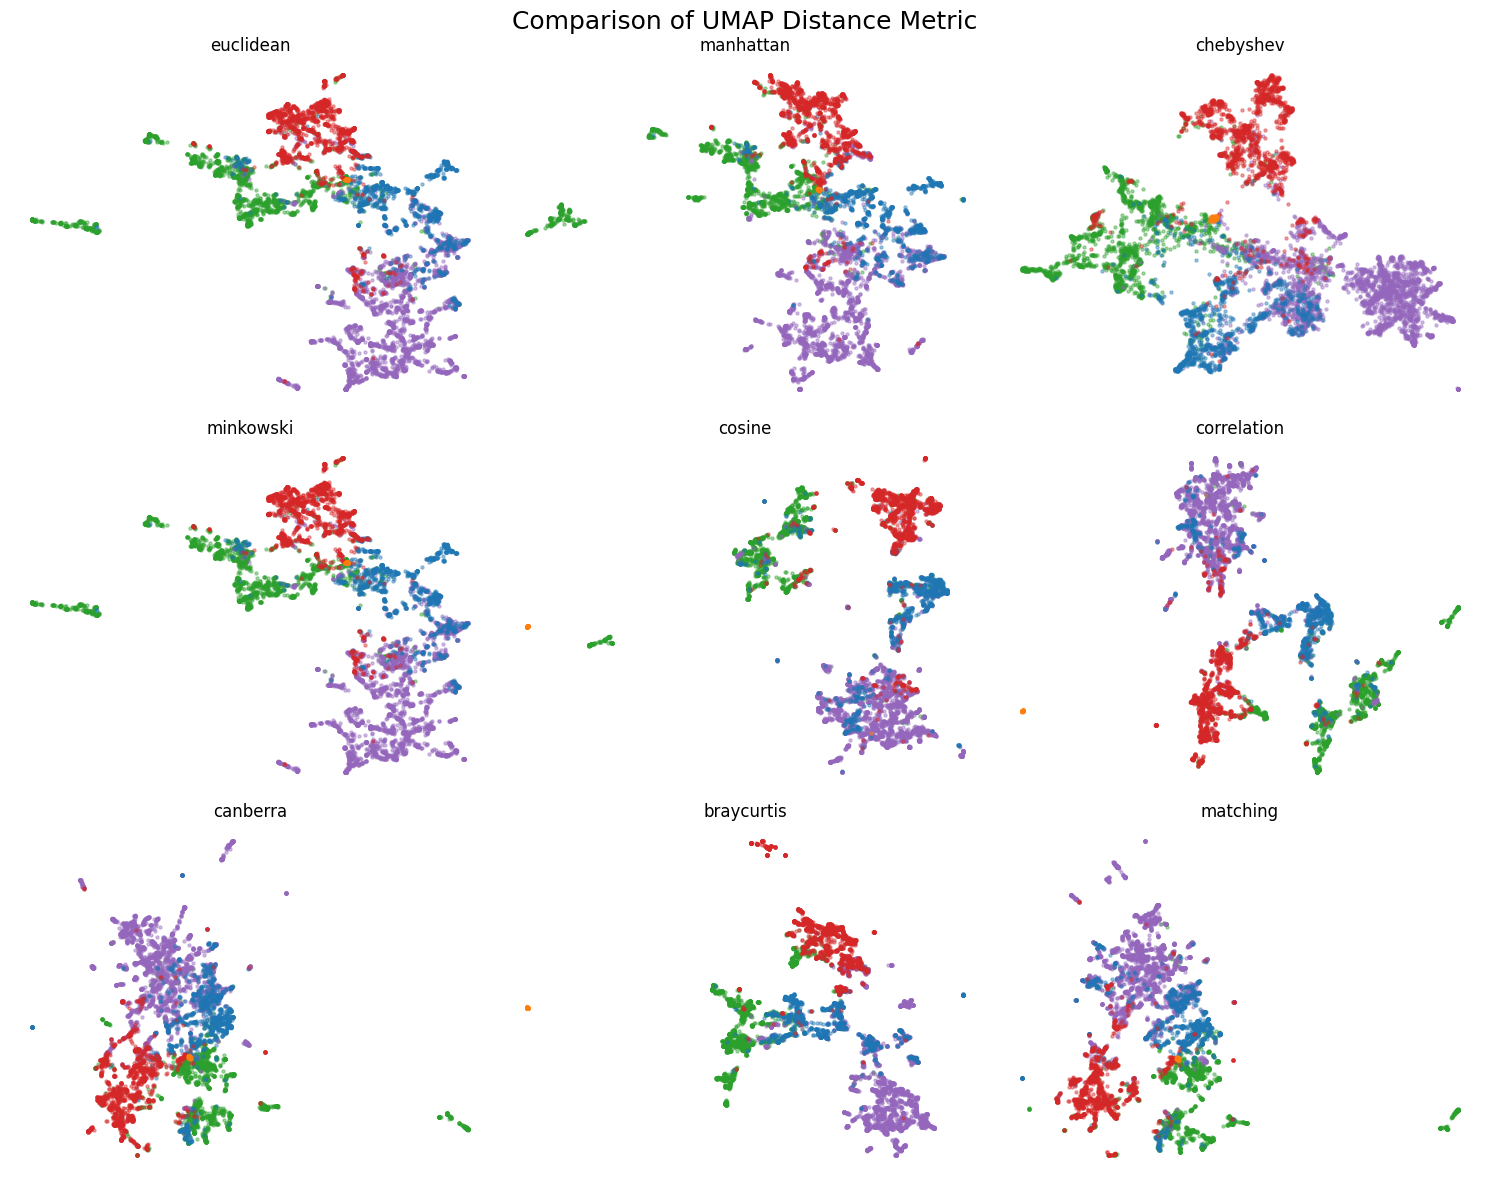

In [9]:
import umap

# === Step 1: Define metric list ===
umap_metrics = [
    "euclidean", "manhattan", "chebyshev", "minkowski", "cosine",
    "correlation", "canberra", "braycurtis", "matching"
    # Excluded: "mahalanobis", "wminkowski", "seuclidean" — need extra args
]

# === Step 2: Embeddings and Domain data ===
embeddings = df_topics_embeddings
df_vis_base = df_works.copy()            # must have 'Domain' column

# === Step 3: UMAP hyperparameters ===
n_neighbors = 15
min_dist = 0.1

# === Step 4: Domain color map ===
domain_colors = {
    'physical sciences': '#2ca02c',
    'health sciences': '#9467bd',
    'life sciences': '#1f77b4',
    'social sciences': '#d62728',
    'unknown': '#ff7f0e'
}


# === Step 5: Store clustering results ===
clustering_results_metric_topics = {}  # {metric: {silhouette, ch, db}}

# === Step 7: Plot grid ===
n_cols = 3
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for idx, metric in enumerate(umap_metrics):
    ax = axes[idx]
    
    # Fit UMAP with current metric
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=2,
        metric=metric,
        random_state=42
    )
    
    try:
        umap_coords = reducer.fit_transform(embeddings)
    except Exception as e:
        print(f"UMAP failed for metric '{metric}': {e}")
        ax.set_title(f"{metric} (error)")
        ax.axis("off")
        continue

    # Build df with coordinates
    df_vis = df_vis_base.copy()
    df_vis["x"] = umap_coords[:, 0]
    df_vis["y"] = umap_coords[:, 1]

    # Compute clustering metrics
    X = df_vis[["x", "y"]].values
    labels = df_vis["Domain"]
    sil, ch, db = compute_clustering_metrics(X, labels)

    # Save results
    clustering_results_metric_topics[metric] = {
        "silhouette": sil,
        "calinski_harabasz": ch,
        "davies_bouldin": db
    }

    # Plot clusters
    for domain in labels.dropna().unique():
        subset = df_vis[df_vis["Domain"] == domain]
        color = domain_colors.get(domain.lower(), 'gray')
        ax.scatter(subset["x"], subset["y"], s=5, alpha=0.4, color=color)

    ax.set_title(f"{metric}")
    ax.axis("off")

# Turn off unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Comparison of UMAP Distance Metric", fontsize=18)
plt.show()


In [10]:
print(clustering_results_metric_topics)

{'euclidean': {'silhouette': np.float32(0.116964854), 'calinski_harabasz': np.float32(3619.0762), 'davies_bouldin': np.float64(1.0722430533955507)}, 'manhattan': {'silhouette': np.float32(0.06326825), 'calinski_harabasz': np.float32(3034.6414), 'davies_bouldin': np.float64(1.109203230539378)}, 'chebyshev': {'silhouette': np.float32(0.20389156), 'calinski_harabasz': np.float32(4323.197), 'davies_bouldin': np.float64(0.8896542274828809)}, 'minkowski': {'silhouette': np.float32(0.116964854), 'calinski_harabasz': np.float32(3619.0762), 'davies_bouldin': np.float64(1.0722430533955507)}, 'cosine': {'silhouette': np.float32(0.34822407), 'calinski_harabasz': np.float32(4073.1016), 'davies_bouldin': np.float64(0.8303151937193407)}, 'correlation': {'silhouette': np.float32(0.35345376), 'calinski_harabasz': np.float32(3976.5881), 'davies_bouldin': np.float64(0.9297958151780238)}, 'canberra': {'silhouette': np.float32(3.9489234e-05), 'calinski_harabasz': np.float32(1861.3761), 'davies_bouldin': np

In [11]:
df_metrics_topics = pd.DataFrame.from_dict(clustering_results_metric_topics, orient='index')
print(df_metrics_topics)

             silhouette  calinski_harabasz  davies_bouldin
euclidean      0.116965        3619.076172        1.072243
manhattan      0.063268        3034.641357        1.109203
chebyshev      0.203892        4323.196777        0.889654
minkowski      0.116965        3619.076172        1.072243
cosine         0.348224        4073.101562        0.830315
correlation    0.353454        3976.588135        0.929796
canberra       0.000039        1861.376099        1.413540
braycurtis     0.253680        3614.160400        0.960708
matching       0.057081        2321.828857        1.322089
